<a href="https://colab.research.google.com/github/Madeira-International-Workshop-in-ML/2022_day_3/blob/main/for_students_LSTM_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" 
Load libraries
"""

import warnings # clear warnings 
warnings.filterwarnings('ignore')

import numpy as np # manipulate data 
import pandas as pd

# check performance
from sklearn.metrics import confusion_matrix

# plot data
%matplotlib inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set_theme()

import tensorflow as tf # nn models 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential

import datetime, os # for tensorBoard

In [ ]:
""" 
Load dataset and check the shape
"""

(xTrain, yTrain), (xTest, yTest) = mnist.load_data() # load dataset

print('MNIST Dataset Shape:') # print dataset shape
print('Train Images: ' + str(xTrain.shape))
print('Train Labels: ' + str(yTrain.shape))
print('Test Images:  ' + str(xTest.shape))
print('Test Labels:  ' + str(yTest.shape))

In [ ]:
""" 
Check dataset images
"""

samplesIdx = [13, 80, 102] # select three images to visualize 

fig = plt.figure() # figure to plot the example images

ax1 = fig.add_subplot(121) # check in detail the first image with gray color map
ax1.imshow(xTest[samplesIdx[0]].reshape([28,28]), cmap='gray')

X, Y = np.meshgrid(np.linspace(0,28,28), np.linspace(0,28,28)) # 3d projection
Z =  100 * np.ones(X.shape)
ax = fig.add_subplot(122, projection='3d')
ax.set_zlim((0,200))
offset=200
for i in samplesIdx:
    img = xTest[i].reshape([28,28]).transpose()
    ax.contourf(X, Y, img, 200, zdir='z', offset=offset, cmap="gray")
    offset -= 100
    ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.show() # show the images

for i in samplesIdx: # present the deatials of the selected images
    print ("Sample: {0} - Class: {1}".format(i, yTest[i]))


Every example from the MNIST dataset is a 28x28 image. We are going to apply LSTM on it in row-by-row analysis.

The LSTM cells are seeing the ith row of the image in the ith step, that is, a vector of size 28. The total number of time steps is 28.

An alternative is to do pixel-by-pixel where the The LSTM cells are seeing the ith pixel in the ith step, ouputing the last LSTM cell. The total number of time steps is 28*28 = 784. The pixel-by-pixel case is a lot harder because a decent model has to keep a very long-term memory.

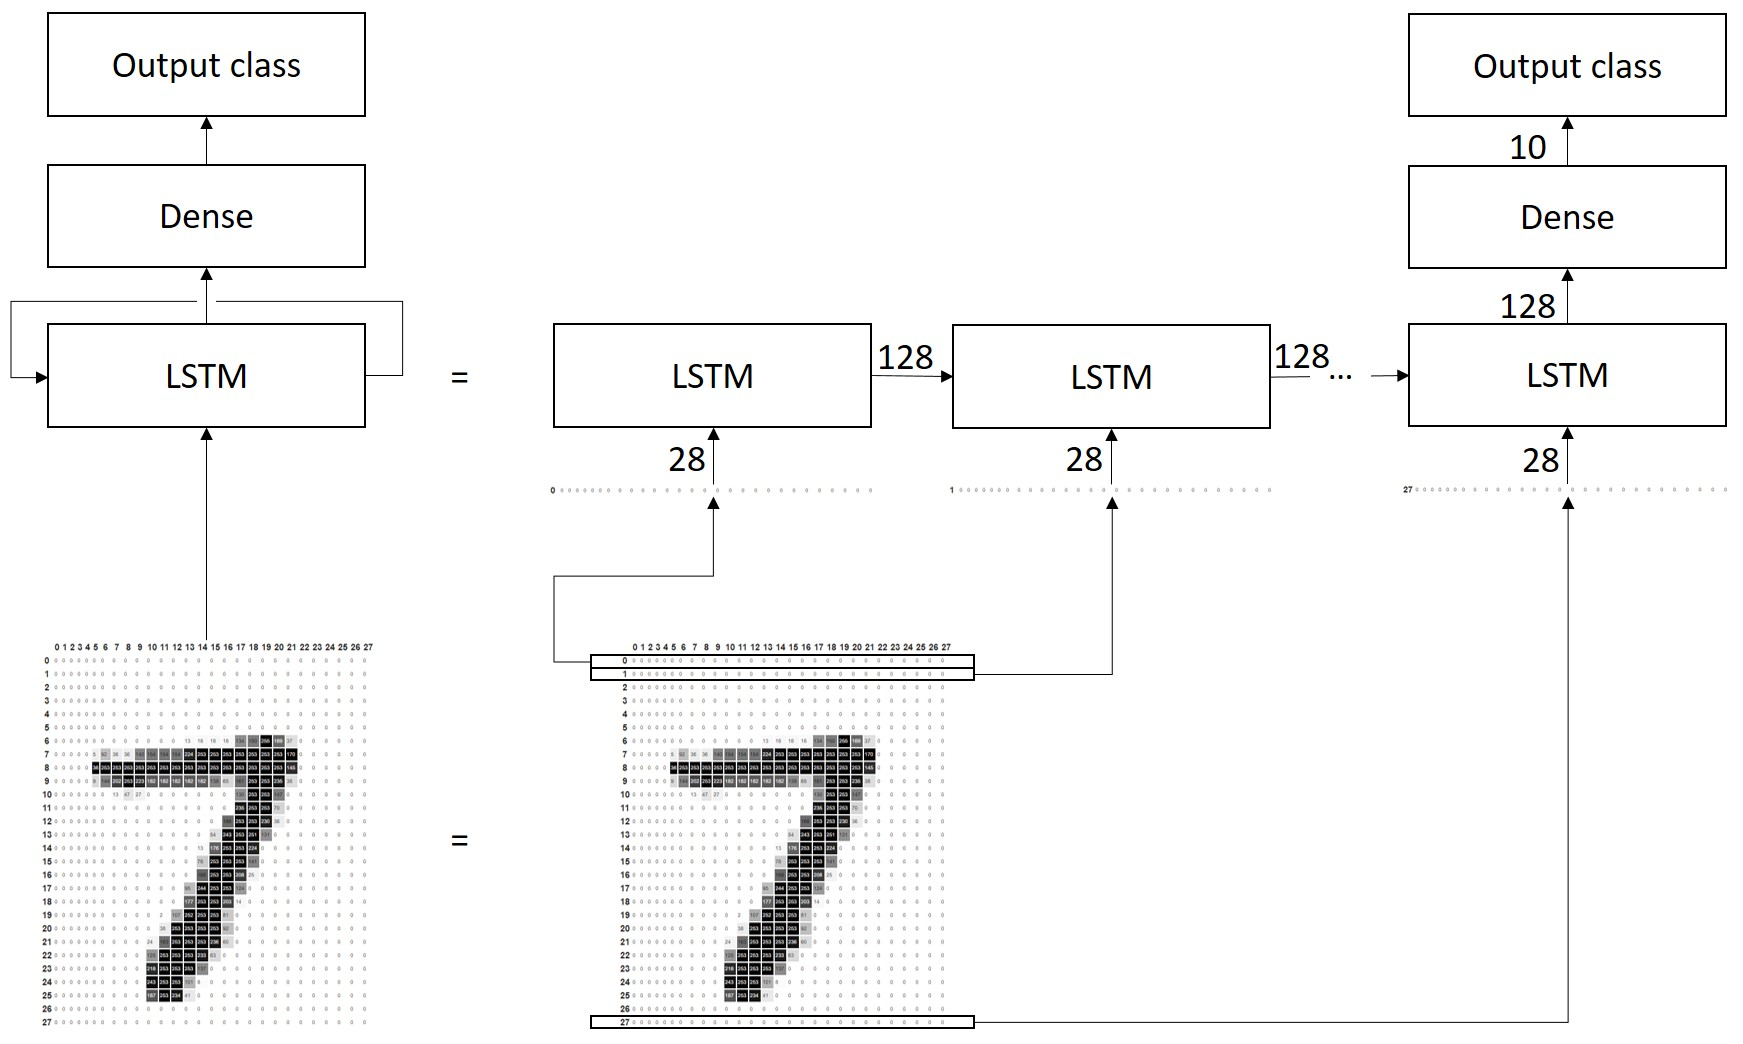

In [ ]:
"""
Produce the nn
"""

# fix the seed to replicate the results


# use the sequential model


# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# characterisitics of the model
print('Number of time steps: ' + str(xTrain.shape[1])) 
print('Number of features: ' + str(xTrain.shape[2]))
model.summary()

In [ ]:
"""
Train and examine the model
"""

# 17 min and 23 s on CPU
# 2 min and 51 s on GPU

# to run on GPU: Runtime->Change runtime type->Hardware Accelerator->GPU
# para correr em GPU: Tempo de execução->Alterar tipo de tempo de execução
# ->Acelerador de hardware->GPU

# callbacks for tensorBoard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# train the model


%load_ext tensorboard
%tensorboard --logdir logs

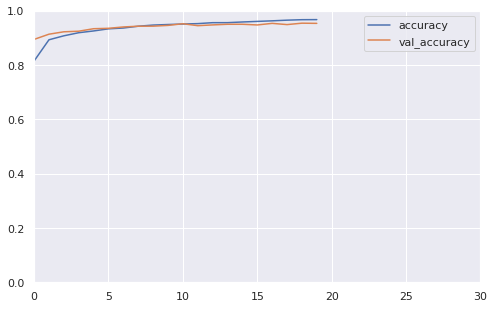

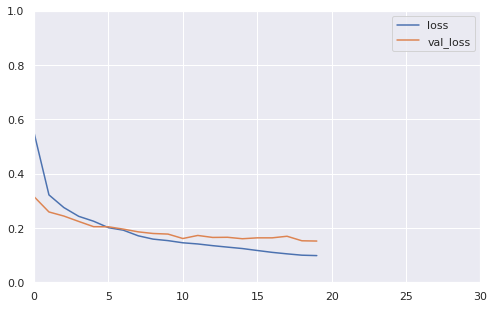

313/313 [==============================] - 1s 3ms/step - loss: 0.1807 - accuracy: 0.9438


[0.18066298961639404, 0.9437999725341797]

In [ ]:
"""
Cehck the performance of the trained model
"""

# draw accuracy image
data = {}
data['accuracy'] = history.history['accuracy']
data['val_accuracy'] = history.history['val_accuracy']
pd.DataFrame(data).plot(figsize=(8, 5))
plt.grid(True)
plt.axis([0, 30, 0, 1])
plt.show()

# draw loss image
data = {}
data['loss'] = history.history['loss']
data['val_loss'] = history.history['val_loss']
pd.DataFrame(data).plot(figsize=(8, 5))
plt.grid(True)
plt.axis([0, 30, 0, 1])
plt.show()

# verify the model performance
model.evaluate(xTest, yTest, verbose=1)

In [ ]:
"""
Plot the confusion matrix
"""

# produce predictions


# convert to categorical


# confusion matrix
cm = confusion_matrix(predicted_categories, yTest) 
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")

In [ ]:
"""
Check the missclassified images
"""

# dataframe with the index of all misclassifications
dataOutput = pd.DataFrame([predicted_categories != yTest]).astype(int)

checkMissclassifiedImage = 1 # select the missclassified image to check

i = 0 # plot the missclassified image
for k in range (0, len (yTest), 1):
  if int (dataOutput[k]) == 1:
    if checkMissclassifiedImage == i:
      break
    else:
      fig = plt.figure
      plt.imshow(xTest[k], cmap='gray')
      plt.show()
      print('True label: ' + str(yTest[k])) 
      print('Predicted label: ' + str(int(predicted_categories[k])))
    i += 1